<a href="https://colab.research.google.com/github/Jannahan/CM2604-ML-Coursework/blob/Develop/2409089_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import required libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [15]:
# Mount Google Drive for dataset access
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Load the dataset
file_path = '/content/drive/My Drive/ML_Coursework/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

#Dataset

In [17]:
# Display dataset summary
print(data.head())
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

#Preprocessing

In [18]:
# Data Preprocessing
print("missing values")
print(data.isnull().sum())

print("unique values in each column")
print(data.nunique())

# Replace 'unknown' values with NaN to mark 'unknown' values as missing data (NaN),
data.replace("unknown", pd.NA, inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Encode the target column ('y')
# This step converts categorical target values into numerical format for machine learning models.
data_encoded['y'] = data['y'].map({'yes': 1, 'no': 0})

# Confirm encoding
print(data_encoded.head())

# Separate features and target
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and testing data split completed.")

missing values
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
unique values in each column
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64
   age  duration  campaign 

#Random Forest

Random Forest ROC-AUC Score: 1.0


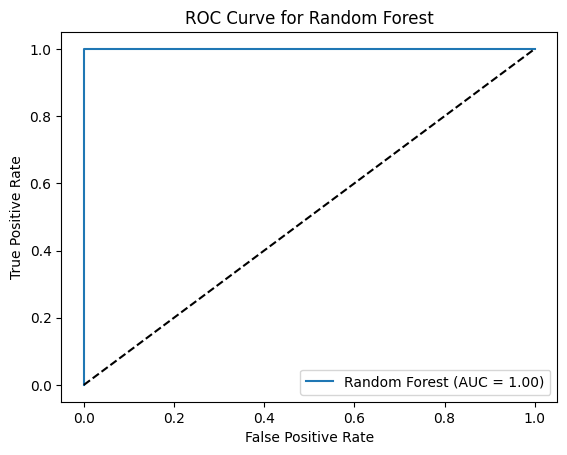

Random Forest Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

Confusion Matrix:
 [[10968     0]
 [    0  1389]]
Top 10 Important Features:
             Feature  Importance
47             y_yes    0.698003
1           duration    0.090111
9        nr.employed    0.035375
8          euribor3m    0.034701
3              pdays    0.018515
46  poutcome_success    0.016436
0                age    0.013494
5       emp.var.rate    0.013305
7      cons.conf.idx    0.013274
6     cons.price.idx    0.009717


In [25]:
# Initialize and train Random Forest Classifier
# Using 100 estimators to ensure robust decision-making.
# Random state is set for reproducibility of results.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate ROC-AUC for Random Forest
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC Score:", rf_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Evaluate Random Forest
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Display top 10 important features
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Top 10 Important Features:")
print(importances_df.head(10))


# Random Forest Without duration

In [20]:
# Drop 'duration' from training and testing sets
X_train_rf = X_train.drop(columns=['duration'])
X_test_rf = X_test.drop(columns=['duration'])

# Initialize and train the Random Forest Classifier without 'duration'
rf_model_no_duration = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_no_duration.fit(X_train_rf, y_train)

# Make predictions and evaluate
y_pred_rf_no_duration = rf_model_no_duration.predict(X_test_rf)

# Evaluate the model
print("Random Forest (Without 'duration') Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_no_duration))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_no_duration))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_no_duration))

Random Forest (Without 'duration') Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

Confusion Matrix:
 [[10968     0]
 [    0  1389]]


# Random Forest without y_yes

In [21]:
# Drop 'y_yes' from training and testing sets
if 'y_yes' in X_train.columns:
    X_train_rf = X_train.drop(columns=['y_yes'])
    X_test_rf = X_test.drop(columns=['y_yes'])

    rf_model_no_y_yes = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_no_y_yes.fit(X_train_rf, y_train)

    y_pred_rf_no_y_yes = rf_model_no_y_yes.predict(X_test_rf)
    print("Random Forest (Without 'y_yes') Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf_no_y_yes))
    print("Classification Report:\n", classification_report(y_test, y_pred_rf_no_y_yes))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_no_y_yes))

Random Forest (Without 'y_yes') Results:
Accuracy: 0.9137331067411184
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.48      0.55      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.91      0.91      0.91     12357

Confusion Matrix:
 [[10631   337]
 [  729   660]]


# Neural Network

Class weights: {0: 0.5635457388584831, 1: 4.434174100276838}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9618 - loss: 0.1099 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.1014e-04
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 7.6087e-05 - val_accuracy: 1.0000 - val_loss: 3.7160e-05
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.0786e-05 - val_accuracy: 1.0000 - val_loss: 1.8521e-05
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.5990e-05 - val_accuracy: 1.0000 - val_loss: 9.9606e-06
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 9.0266e-06 - val_accuracy: 1.0000 - val_loss: 5.5975e-06
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 4.7552e-06 - val_accuracy: 1.0000 - val_loss: 3.2965e-06
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accura

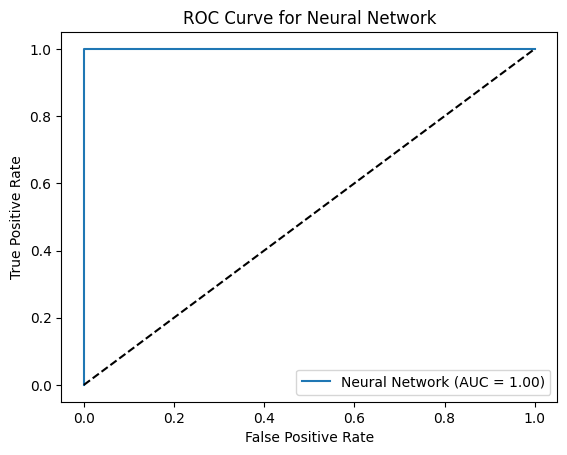

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

Confusion Matrix for Neural Network:
 [[10968     0]
 [    0  1389]]


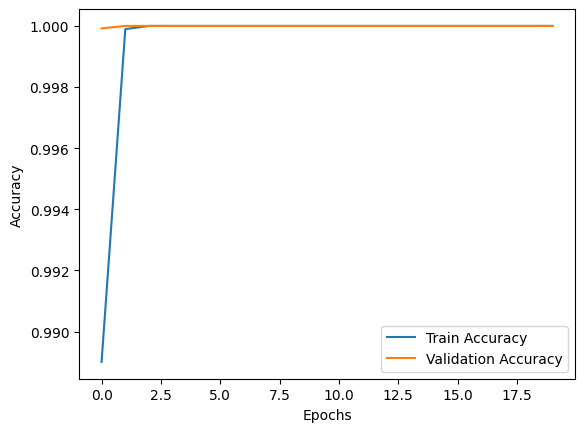

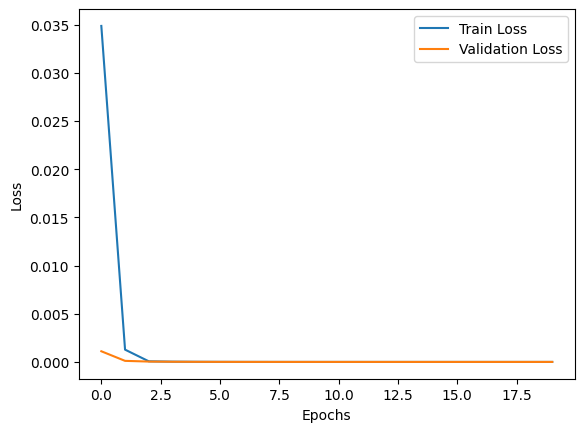

In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights for imbalanced target
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights_dict)

# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model with class weights
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the Neural Network
print("Neural Network Test Accuracy:", model.evaluate(X_test_scaled, y_test)[1])
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate ROC-AUC for Neural Network
nn_auc = roc_auc_score(y_test, model.predict(X_test_scaled))
print("Neural Network ROC-AUC Score:", nn_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_scaled))
plt.figure()
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {nn_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix for Neural Network:\n", confusion_matrix(y_test, y_pred_nn))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SMOTE FOR IMBALANCE

In [23]:
# Apply SMOTE
# SMOTE (Synthetic Minority Oversampling Technique) is used to address class imbalance by generating synthetic examples for the minority class.
# This helps improve model performance by providing balanced training data.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Class distribution after SMOTE:", y_train_smote.value_counts())

# Train Random Forest on SMOTE-balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_rf_smote = rf_model_smote.predict(X_test)
print("Random Forest (With SMOTE) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: y
0    25580
1    25580
Name: count, dtype: int64
Random Forest (With SMOTE) Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10968
           1       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

Confusion Matrix:
 [[10968     0]
 [    0  1389]]
